In [151]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
#from nltk.chunk import ne_chunk
#from nltk.tag import pos_tag
#from nltk.tokenize import word_tokenize
#nltk.download('maxent_ne_chunker')

In [2]:
tweets = pd.read_csv('tweets.csv')

In [194]:
tweets.tail()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,tweet_cleaned
63478,517946537,2021-12-02 16:57:50+00:00,003e69bf5eff2276,1466451555939491840,en,0,0,0,0,Twitter for iPhone,@LisaMcC42451573 @NDiggs22 I said lower resist...,i said lower resistance “unvaccinated peop...
63479,756635793142255616,2021-12-02 16:55:34+00:00,7c781e314564c5e4,1466450982477262851,en,1,0,0,0,Twitter for Android,90 days is all you get with Pfizer vaccine the...,days is all you get with pfizer vaccine then...
63480,739165578,2021-12-02 16:46:06+00:00,ac9b9070f6d17a9a,1466448601392025610,en,0,0,0,0,Twitter for iPhone,"For accurate Covid stats, we need to stop payi...",for accurate covid stats we need to stop payin...
63481,26990725,2021-12-02 16:29:50+00:00,3448f4f82d2187bc,1466444508099448832,en,3,0,3,0,Twitter for Android,@franlondon @MarshaBlackburn Higher the vaccin...,franlondon marshablackburn higher the vaccine ...
63482,26990725,2021-12-02 16:27:01+00:00,3448f4f82d2187bc,1466443797521383424,en,1,0,0,0,Twitter for Android,@Bullix1 @Wenabee1 @MarshaBlackburn Commiecrat...,marshablackburn commiecrats cant stand the...


## Text preprocessing

In [175]:
for tweet in tweets['tweet'].sample(5):
    print(tweet)
    print()

NYPD's largest police union vows to sue over possible COVID vaccine mandate https://t.co/pCQd6kRI3R via @nypmetro

The Biden Admin’s vaccine mandate is unconstitutional. While I hope everyone gets vaccinated against COVID-19, the govt shouldn’t force you to receive the vaccine to keep a job. 

I helped introduce a Congressional Review Act resolution to stop this mandate from moving forward.

COVID VACCINE QUESTIONS?
1. How long is it effective 
2. Will it affect natural immune system functions with continued dosing
3. Are these new strains being developed in the same Wuhan lab
4. If 95% effective does that mean 1 in 20 is not immune
5. Why do healthy kid's need it

@sassygrl423 Hmmmm I think you might be mistaken about political climate being important enough in marriage . 😂😂😂Hell “political climate” has reinforced people’s minds to not get the Covid vaccine.🤷‍♂️🤷‍♂️🤷‍♂️It’s pretty bad.

I get my first COVID Vaccine on Thursday. I haven’t wanted to fly without it, and it just hit me I’

### Remove emojis, change to lower-case and remove punctuations

In [166]:
import emoji as e

text = "Python is 👍"
e.demojize(text)

'Python is :thumbs_up:'

In [181]:
def emoji_and_text_prep(text):
    text = text.lower()
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = e.demojize(text, delimiters=(' :', ': '))
    
    words = re.split(' ', text)
    return ' '.join(words)

In [182]:
test = "@sassygrl423 Hmmmm I think you might be mistaken about political climate being important enough in marriage . 😂😂😂Hell “political climate” has reinforced people’s minds to not get the Covid vaccine.🤷‍♂️🤷‍♂️🤷‍♂️It’s pretty bad."
emoji_and_text_prep(test)

'  hmmmm i think you might be mistaken about political climate being important enough in marriage   :face_with_tears_of_joy:  :face_with_tears_of_joy:  :face_with_tears_of_joy: hell “political climate” has reinforced people’s minds to not get the covid vaccine :man_shrugging:  :man_shrugging:  :man_shrugging: it’s pretty bad'

In [183]:
tweets['tweet_cleaned'] = tweets['tweet'].apply(emoji_and_text_prep)

In [192]:
tweets.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,tweet_cleaned
0,303930546,2021-01-30 23:57:07+00:00,dce44ec49eb788f5,1355666381987999745,en,10,1,2,3,Twitter for iPhone,Dr. Kent Rogers was the Navarro County Medical...,dr kent rogers was the navarro county medical ...
1,15311483,2021-01-30 23:56:43+00:00,e37629210522d6a6,1355666282293682183,en,6,0,0,1,Twitter for Android,Ended up not being able to attend as many sess...,ended up not being able to attend as many sess...
2,177687642,2021-01-30 23:56:07+00:00,0026507132ec5867,1355666133047779336,en,0,0,0,0,Twitter for Android,Pentagon halts plan to give COVID vaccine to a...,pentagon halts plan to give covid vaccine to a...
3,51418905,2021-01-30 23:54:15+00:00,9807c5c5f7a2c6ce,1355665660798504966,en,2,0,3,0,Twitter for iPhone,"How can the COVID vaccine be opened up to 65+,...",how can the covid vaccine be opened up to an...
4,2355037237,2021-01-30 23:47:34+00:00,a1a25de9f5efa69b,1355663980384182272,en,2,0,0,0,Twitter for Android,Here is an additional COVID-19 Vaccine resourc...,here is an additional covid vaccine resource ...


In [195]:
for tweet in tweets['tweet_cleaned'].sample(5):
    print(tweet)
    print('----')

did breaking up with a straight man make me more gay or was it the covid vaccine we will never know 
----
nyroyalking you do what you feel is right for you i lost   people in their early  s to covid  i had the vaccine because i am a rn
----
forhanalex   tippytaff davidmweissman i got an article from cnn because thats who you all trust biden got his first covid vaccine shot in december   biden had not taken office yet biden also said trump deserved some credit due to operation worpspeed 


----
common questions concerns and myths that have emerged about the new covid  vaccines 
----
eat mayonnaise  :face_vomiting:  gt covid  vaccine  :syringe: 
----


## Sentiment Analysis processing
After cleaning the data, I use VADER to consider the sentiment regarding Covid-19 vaccines at different slices of time in 2021.

I first consider sentiment analysis with VADER without any stemming, lemmatization and removing stopwords.

In [196]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [223]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(s):
    a = get_sentiment(s['tweet_cleaned'],sid_analyzer,'pos')
    b = get_sentiment(s['tweet_cleaned'],sid_analyzer,'neg')
    c = get_sentiment(s['tweet_cleaned'],sid_analyzer,'neu')
    d = get_sentiment(s['tweet_cleaned'],sid_analyzer,'compound')
    return a, b, c, d

In [217]:
#test on one tweet
get_sentiment(tweets['tweet_cleaned'][1], sid_analyzer)

0.147

In [ ]:
tweets[[
    'pos_sentiment', 
    'neg_sentiment', 
    'neu_sentiment', 
    'comp_sentiment']
] = tweets.apply(get_sentiment_scores, axis=1, result_type='expand')

In [227]:
tweets.tail()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,tweet_cleaned,pos_sentiment,neg_sentiment,neu_sentiment,comp_sentiment
63478,517946537,2021-12-02 16:57:50+00:00,003e69bf5eff2276,1466451555939491840,en,0,0,0,0,Twitter for iPhone,@LisaMcC42451573 @NDiggs22 I said lower resist...,i said lower resistance “unvaccinated peop...,0.000,0.329,0.671,-0.7479
63479,756635793142255616,2021-12-02 16:55:34+00:00,7c781e314564c5e4,1466450982477262851,en,1,0,0,0,Twitter for Android,90 days is all you get with Pfizer vaccine the...,days is all you get with pfizer vaccine then...,0.000,0.000,1.000,0.0000
63480,739165578,2021-12-02 16:46:06+00:00,ac9b9070f6d17a9a,1466448601392025610,en,0,0,0,0,Twitter for iPhone,"For accurate Covid stats, we need to stop payi...",for accurate covid stats we need to stop payin...,0.091,0.049,0.861,0.2263
63481,26990725,2021-12-02 16:29:50+00:00,3448f4f82d2187bc,1466444508099448832,en,3,0,3,0,Twitter for Android,@franlondon @MarshaBlackburn Higher the vaccin...,franlondon marshablackburn higher the vaccine ...,0.000,0.141,0.859,-0.3182
63482,26990725,2021-12-02 16:27:01+00:00,3448f4f82d2187bc,1466443797521383424,en,1,0,0,0,Twitter for Android,@Bullix1 @Wenabee1 @MarshaBlackburn Commiecrat...,marshablackburn commiecrats cant stand the...,0.000,0.148,0.852,-0.7677


In [229]:
# save to disk
tweets.to_csv('tweets_w_sentiment.csv')

## Sentiment analysis

In [248]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [297]:
import calendar

grouped_tweets = tweets.groupby(tweets['created_at'].dt.month).mean()
grouped_tweets = grouped_tweets.reset_index()
grouped_tweets['month'] = grouped_tweets['created_at'].apply(lambda x: calendar.month_abbr[x])
#grouped_tweets['month'] = pd.to_datetime(tweets['created_at']).strftime("%m")

In [299]:
grouped_tweets

,created_at,author id,id,like_count,quote_count,reply_count,retweet_count,pos_sentiment,neg_sentiment,neu_sentiment,comp_sentiment,month
0,1,2.359786e+17,1.353452e+18,8.883143,0.225801,0.833456,1.454729,0.089249,0.060177,0.846343,0.090180,Jan
1,2,2.475004e+17,1.362763e+18,10.197608,0.184545,0.767065,1.663477,0.090869,0.055869,0.850138,0.108780,Feb
2,3,2.364184e+17,1.374592e+18,9.093245,0.175661,0.909508,1.080764,0.087998,0.048776,0.861391,0.117479,Mar
3,4,2.548280e+17,1.384592e+18,9.341198,0.199631,0.907650,1.526083,0.086644,0.063533,0.848166,0.072599,Apr
4,5,4.593641e+17,1.393831e+18,5.862355,0.125299,0.733186,0.934955,0.081351,0.054844,0.862883,0.075972,May
5,6,2.767042e+17,1.404598e+18,9.165545,0.192221,0.984044,1.553977,0.098283,0.072008,0.827715,0.063802,Jun
6,7,2.936932e+17,1.418807e+18,38.607514,0.663323,1.491519,3.918293,0.083724,0.092353,0.821908,-0.042546,Jul
7,8,2.687509e+17,1.429989e+18,52.965907,1.086782,1.853965,8.929444,0.104896,0.083851,0.809257,0.030692,Aug
8,9,3.285860e+17,1.439959e+18,12.372302,0.259422,1.244237,2.304793,0.082469,0.088928,0.826229,-0.042028,Sep
9,10,3.146025e+17,1.449386e+18,9.977534,0.202922,1.006941,2.146119,0.084492,0.091329,0.822739,-0.031935,Oct


Text(0, 0.5, 'Intensity of Sentiment')

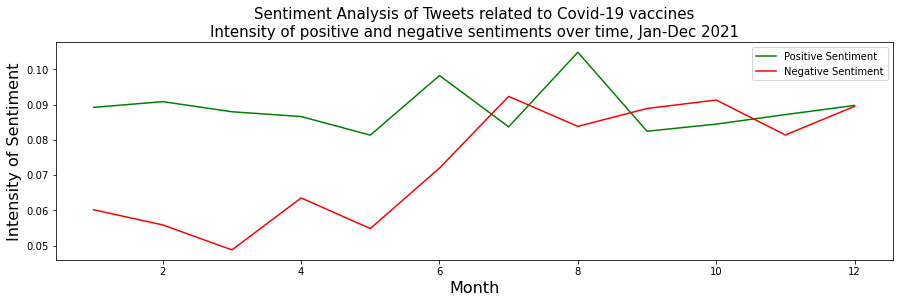

In [322]:
fig, ax = plt.subplots(figsize = (15,4))
ax = sns.lineplot(x = 'created_at', y = 'pos_sentiment', data = grouped_tweets, color='g')
ax = sns.lineplot(x = 'created_at', y = 'neg_sentiment', data = grouped_tweets, color='r')

plt.title('Sentiment Analysis of Tweets related to Covid-19 vaccines\nIntensity of positive and negative sentiments over time, Jan-Dec 2021', fontsize=15)
plt.legend(labels=["Positive Sentiment","Negative Sentiment"])
#plt.xlabel("X-axis")

ax.set_xlabel("Month", fontsize = 16)
ax.set_ylabel("Intensity of Sentiment", fontsize = 16)
#ax.set_xticklabels(grouped_tweets['month'])
